# Plotting Notebook

Hi! Welcome :) This code was originally created by Marilena Lykiardopoulou and was refreshed and commented by Annabelle Czihaly. 
The goal of this script is to create plot ToF, sigma ToF, counts, signal to noise, and ToF effect for on and off resonant scans.
Make a copy and try with your own data! Need a hand? Please forward your questions to aczihaly@triumf.ca

#### import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit

#### define tof_resonance which needs 1 input: a dataframe

In [2]:
def tof_res(df): 
    
    ToF = []
    counts = []
    sigma = []
    capture_time = []
    
    for i in range(0, max(df['x_step_idx'])+1):
        
        df_i = df.loc[df['x_step_idx']==i]
        
        ToF.append(np.average(df_i['tof']))
        sigma.append(np.std(df_i['tof'])) #standard deviation of ToF
        counts.append(len(df_i['tof'])) 
        
        # turn df_i['step_value_ppg'] into a list
        # from this list, remove all [] brackets
        # make all values floats
        # get the average of them 
        
        capture_time.append(np.average([float(item.strip('[]')) for item in df_i['step_value_ppg'].str.split(',').str[0]]))
        
    return ToF, sigma, counts, capture_time

#### load in data and use function created above

In [3]:
df = pd.read_csv("run43028.csv") 
#df = df.loc[(df['tof']>=40) & (df['tof']<=120)] #tof cut on dataframe 

df_off_res = df.loc[df['y_step_idx']==0] #off resonance condition
df_on_res = df.loc[df['y_step_idx']==1] #on resonance condition

ToF_off_res, sigma_off_res, counts_off_res, capture_time = tof_res(df_off_res)
ToF_on_res, sigma_on_res, counts_on_res, capture_time = tof_res(df_on_res)

#### make plots

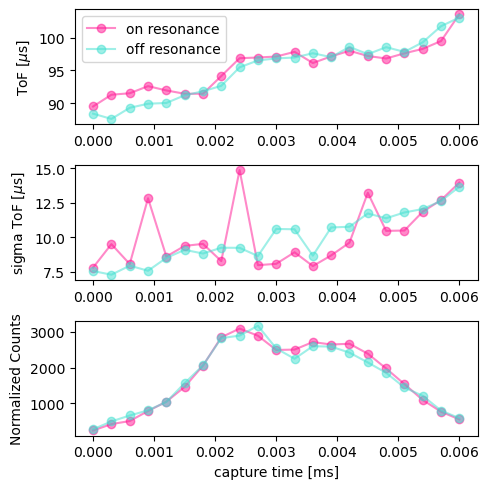

In [4]:
fig, axs = plt.subplots(3, figsize = [5, 5])

axs[0].plot(capture_time, ToF_on_res, marker = 'o', color = 'deeppink', label = 'on resonance', alpha =0.5)
axs[0].plot(capture_time, ToF_off_res, marker = 'o', color = 'turquoise', label = 'off resonance', alpha =0.5)
axs[0].set_ylabel('ToF [$\mu$s]')
axs[0].legend()

axs[1].plot(capture_time, sigma_on_res, marker = 'o', color = 'deeppink', alpha =0.5)
axs[1].plot(capture_time, sigma_off_res, marker = 'o', color = 'turquoise', alpha =0.5)
axs[1].set_ylabel('sigma ToF [$\mu$s]')

axs[2].plot(capture_time, counts_on_res, marker = 'o', color='deeppink', alpha =0.5)
axs[2].plot(capture_time, counts_off_res, marker = 'o', color='turquoise', alpha =0.5)
axs[2].set_ylabel('Normalized Counts')
axs[2].set_xlabel('capture time [ms]')

plt.tight_layout()
#plt.savefig('Run45922.png', dpi = 200)

#### create functions for tof effect and signal to noise
##### tof effect = (tof on resonance - tof off resonance) / tof off resonance
##### signal to noise = (tof on resonance - tof off resonance) / sigma tof

In [5]:
tof_effect = [((xi - yi) / yi)*100 for xi, yi in zip(ToF_on_res, ToF_off_res)]

signal_to_noise = [((xi - yi) / sigmai) for xi, yi, sigmai in zip(ToF_on_res, ToF_off_res, sigma_on_res)]

#signal_to_noise = [np.array(ToF22)-np.array(ToF)]/np.array(sigma)

#### create plots of signal to noise and tof effect

Text(0.5, 0, 'capture time [ms]')

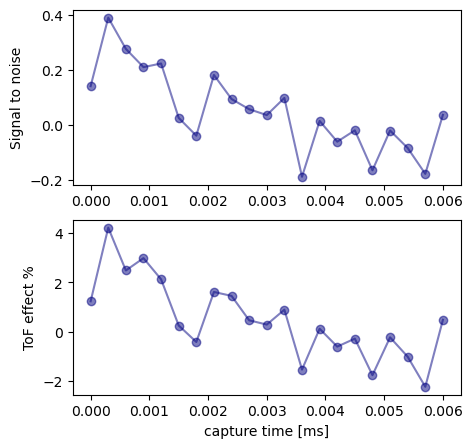

In [6]:
fig, axs = plt.subplots(2, figsize = [5,5])

axs[0].plot(capture_time, signal_to_noise, marker = 'o', color='navy', alpha = 0.5)
axs[0].set_ylabel('Signal to noise')

axs[1].plot(capture_time, tof_effect, marker = 'o', color='navy', alpha = 0.5)
axs[1].set_ylabel('ToF effect %')
axs[1].set_xlabel('capture time [ms]')